In [1]:
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from collections import Counter
from sklearn.feature_extraction import DictVectorizer

In [2]:
def load_data(in_file, brands_to_load = None, max_limit = 1404, verbose = False, randomize = True):
    """Loads data from the given data file.
    If the brands to be loaded is less than the maximum rows in the datafile, randomize the loading.
    Args:
      brands_to_load .... Number of brands to be loaded.
      in_file       .... A string representing the location and datafile name to be loaded.
    Returns:
      None. The data is loaded into the global variables."""
    
    if brands_to_load is None:
        brands_to_load = max_limit 
    
    #Randomize Loading
    if brands_to_load != max_limit:
        if randomize:
            choices = sorted(random.sample(range(max_limit), brands_to_load))
            max_row_id = max(choices)
        else:
            choices = range(brands_to_load)
            max_row_id = max(choices)
    else:
        choices = range(max_limit)
        max_row_id = max_limit-1
    
    brand_no = 0
    cur_idx = 0
    brand_followers = list()        
    with open(in_file) as data_file:
        for row in data_file:
            if brand_no > max_row_id:
                break
            if brand_no != choices[cur_idx]:
                brand_no += 1
                continue
            else:
                followers = row.split()
                brand = followers.pop(0)
                followers_count = len(followers)
                
                #Ignoring brands with less than 1000 followers
                if followers_count > 1000:  
                    followers = [int(x) for x in followers]
                    followers_dict = Counter(followers)
                    brand_followers.append(followers_dict)
                    BRANDS_LIST.append(brand)
                    
                    print('Loaded',brand,'-',followers_count,'followers')
                else:
                    print('Skipped',brand,'-',followers_count,'followers')
                    
                brand_no += 1
                cur_idx += 1
                    
    return DV.fit_transform(brand_followers)

In [3]:
BRANDS_LIST = []
verbose = True
randomize = True
DV = DictVectorizer(dtype=int)
start = datetime.now()

#brands_to_load = 50
#max_rows = 1404
#DATASET = load_data('data/brand_followers_final.tsv', brands_to_load, max_rows, verbose, randomize)

brands_to_load = 469
max_rows = 469
DATASET = load_data('data/brand_followers_corrected_full.tsv', brands_to_load, max_rows, verbose, randomize)
print('Elapsed:',datetime.now()-start)
N_BRANDS,N_FOLLOWERS = DATASET.get_shape()
print('No. of Unique Followers', N_FOLLOWERS)
print('No. of Brands', N_BRANDS)

Loaded 100percentpure - 11429 followers
Loaded 18rabbits - 1789 followers
Loaded 34degrees - 2697 followers
Loaded 5hourenergy - 18694 followers
Loaded 7daysinutopia - 1505 followers
Loaded 7up - 110246 followers
Loaded 8oclockcoffee - 24860 followers
Loaded 8thcontinentsoy - 1950 followers
Loaded abreva - 2433 followers
Loaded acer - 47016 followers
Loaded acneorg - 4404 followers
Loaded activia - 5682 followers
Loaded acureorganics - 7438 followers
Loaded adidas - 500000 followers
Loaded afterglow - 2341 followers
Loaded airheads - 17691 followers
Loaded alaffiaskincare - 2868 followers
Loaded alchimieforever - 2285 followers
Loaded alimapure - 5366 followers
Loaded allegraotc - 1543 followers
Loaded allegrocoffee - 3417 followers
Loaded allure_magazine - 424996 followers
Loaded alternahaircare - 25601 followers
Loaded alvaradostreet - 2169 followers
Loaded always - 28749 followers
Loaded amanabrand - 10870 followers
Loaded american_girl - 18089 followers
Loaded ampenergy - 19763 fol

In [4]:
def get_followers(brand):
    return DATASET.getrow(brand)
    
def reset_brand(user, brand):
    DATASET[brand, user] = 0

def set_brand(user, brand):
    DATASET[brand, user] = 1
    
def get_brands(user):
    return DATASET.getcol(user).nonzero()[0]

def get_brand_id(brand):
    return BRANDS_LIST.index(brand)

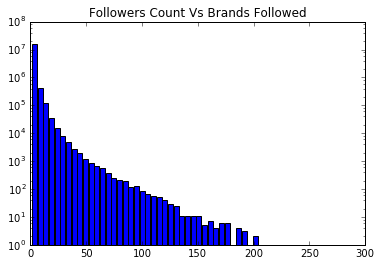

In [5]:
def plot_histogram(data,title):
    hist, bins = np.histogram(np.asarray(data),bins=50)    
    width = 0.9 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.yscale("log")
    plt.bar(center, hist, align='center', width=width)
    plt.title(title)

plot_histogram(sum(DATASET).toarray(), 'Followers Count Vs Brands Followed')

In [6]:
def sample_followers(brands_min, sample_pct, split_ratio):
    x = sum(DATASET).toarray()
    followers = np.where(x >= 5)[1]
    sample = random.sample(list(followers), int(len(followers) * sample_pct))
    print('Sample taken: %d/%d followers.' % (len(sample),len(list(followers))))
    train_sample_size = int(split_ratio * len(sample))
    train_sample = sample[:train_sample_size]
    test_sample = sample[train_sample_size:]
    print('Training samples:',train_sample_size)
    print('Testing samples:',len(sample)-train_sample_size)
    return train_sample, test_sample #return sample

train_samples, test_samples = sample_followers(brands_min=5, sample_pct= 0.01, split_ratio=0.75)
#follower_ids = sample_followers(brands_min=5, sample_pct= 0.01, split_ratio=0.75)


Sample taken: 11324/1132466 followers.
Training samples: 8493
Testing samples: 2831


In [7]:
def get_negative_samples(followers):
    brands = {}
    for f in followers:
        brands_not_followed = np.delete(np.arange(N_BRANDS),get_brands(f)) 
        brands[f] = random.choice(list(brands_not_followed))
    return brands

brands_for_training = get_negative_samples(train_samples)

In [ ]:
def remove_links(followers):
    brands_to_remove = {}
    for f in followers:
        brand = random.choice(list(get_brands(f)))
        brands_to_remove[f] = brand
        reset_brand(f,brand)
        print('Removed link', DV.get_feature_names()[f],'-',BRANDS_LIST[brand])
    return brands_to_remove
removed_brands = remove_links(train_samples)

Removed link 92867640 - jaguarusa
Removed link 723125564471537668 - astonmartin
Removed link 3197722076 - givenchy
Removed link 2273361343 - dodge
Removed link 2465042393 - guess
Removed link 3036155041 - astonmartin
Removed link 3245414984 - armani
Removed link 707169662769889280 - instyle
Removed link 123400512 - jaguarusa
Removed link 766979187395686400 - quaker
Removed link 314153701 - dpolaner
Removed link 381658800 - adidas
Removed link 546926640 - izze
Removed link 3046875559 - astonmartin
Removed link 2553924032 - elizabetharden
Removed link 1309411710 - formaggio
Removed link 3495984141 - drpepper
Removed link 3397493903 - cadillac
Removed link 80266190 - kettlebrand
Removed link 24218906 - benandjerrys
Removed link 3299086444 - jeep
Removed link 2525957660 - guess
Removed link 4267181361 - earthsbest
Removed link 2994401979 - bugatti
Removed link 3027927074 - blue_bunny
Removed link 471601982 - kia
Removed link 778752237002563584 - givenchy
Removed link 1069832112 - burberry


In [9]:
def get_similarity_matrix():
    DIST_MAT = np.zeros((N_BRANDS,N_BRANDS))
    
    for brand_pair in combinations(range(N_BRANDS),2):
            
            b1 = get_followers(brand_pair[0])
            b2 = get_followers(brand_pair[1])
            
            common_connections = b1.multiply(b2).sum()
            total_connections = b1.sum() + b2.sum() - common_connections
            sim = common_connections/total_connections
            
            DIST_MAT[brand_pair[0] , brand_pair[1]] = DIST_MAT[brand_pair[1] , brand_pair[0]] = sim
            
    return DIST_MAT

DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

466 x 466 Similarity Matrix created.


In [10]:
def get_statistics(values):
    import statistics
    mean = statistics.mean(values)
    median = statistics.median(values)
    maximum = max(values)
    minimum = min(values)
    return [mean, median, maximum, minimum]

In [ ]:
def get_rank(sorted_scores, p_brand, n_brand):

    done = 0
    p_rank = None
    n_rank = None
    #print(sorted_scores,p_brand, n_brand)
    for idx, brand_score in enumerate(sorted_scores):
        if brand_score[0] == p_brand:
            p_rank = idx + 1
            done += 1
        elif brand_score[0] == n_brand:
            n_rank = idx + 1
            done += 1
        if done == 2:
            break;
    if done < 2:
        print(p_brand,p_rank, n_brand, n_rank)
    return p_rank, n_rank

In [ ]:
def get_prediction(followers, p_brands, n_brands):
    p_rank = {}
    n_rank = {}
    
    for follower in followers:
        brands_followed = get_brands(follower)
        brands_not_followed = np.delete(np.arange(N_BRANDS),brands_followed)
            
        scores = {}
        for bnf_idx in brands_not_followed:
            scores[bnf_idx] = 0
            
            for bf_idx in brands_followed:
                scores[bnf_idx] += DIST_MAT[bf_idx, bnf_idx]
    
        prediction = sorted(scores.items(), key=lambda x: x[1]/len(brands_followed), reverse=True)
        p_rank[follower], n_rank[follower] = get_rank(prediction, p_brands[follower], n_brands[follower])

        
    return p_rank, n_rank

positive_rank_prediction, negative_rank_prediction = get_prediction(train_samples,removed_brands,brands_for_training)

In [ ]:
plot_histogram(list(positive_rank_prediction.values()),'Jaccard Rank Distribution(+)')

In [ ]:
plot_histogram(list(negative_rank_prediction.values()),'Jaccard Rank Distribution(-)')

In [ ]:
print('\t\t\t  ',['mean', 'median', 'max', 'min'])
positive_statistics = get_statistics(positive_rank_prediction.values())
print('Jaccard Rank Statistics(+)', positive_statistics)
negative_statistics = get_statistics(negative_rank_prediction.values())
print('Jaccard Rank Statistics(-)', negative_statistics)

In [ ]:
def get_worst_prediction(prediction, brands, source='+'):
    if source == '+':
        id_worst,rank_worst = max(prediction.items(), key=lambda x: x[1])
    elif source == '-':
        id_worst,rank_worst = min(prediction.items(), key=lambda x: x[1])
    print('(%s) Worst Jaccard Prediction %d for %s followed by %s'%
          (source, rank_worst, BRANDS_LIST[brands[id_worst]], DV.feature_names_[id_worst]))
    print('Brands Followed', [BRANDS_LIST[x] for x in get_brands(id_worst)])
get_worst_prediction(positive_rank_prediction,removed_brands, '+')
get_worst_prediction(negative_rank_prediction,brands_for_training,'-')

In [ ]:
def bar_plot(data_points, title):
    x = [p[0] for p in data_points]
    y = [p[1] for p in data_points]
    plt.bar(x,y)
    plt.title(title)

In [ ]:
def get_rank_by_brands_count(follower_ids, prediction_rank):
    mean_rank = {}
    brands_followed_count = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in mean_rank.keys():
            mean_rank[count] += prediction_rank[follower_id]
            brands_followed_count[count] += 1
        else:
            mean_rank[count] = prediction_rank[follower_id]
            brands_followed_count[count] = 1
    for k in mean_rank:
        mean_rank[k] //= brands_followed_count[k]
    return mean_rank

In [ ]:
positive_mean_ranks = get_rank_by_brands_count(train_samples, positive_rank_prediction)
bar_plot(positive_mean_ranks.items(),'Average Rank by number of brands followed(+)')

In [ ]:
negative_mean_ranks = get_rank_by_brands_count(train_samples, negative_rank_prediction)
bar_plot(negative_mean_ranks.items(),'Average Rank by number of brands followed(-)')

In [ ]:
def get_ranks_by_followed_brands_count(follower_ids, rank_prediction):

    statistics = {}
    brands_followed = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in brands_followed.keys():
            brands_followed[count].append(rank_prediction[follower_id])
        else:
            brands_followed[count] = [rank_prediction[follower_id]]
    for key in brands_followed:
        statistics[key] = get_statistics(brands_followed[key])
    
    return statistics

positive_binned_statistics = get_ranks_by_followed_brands_count(train_samples, positive_rank_prediction)
negative_binned_statistics = get_ranks_by_followed_brands_count(train_samples, negative_rank_prediction)

In [ ]:
def get_Jaccard_scores(follower_id):
    
    brands_followed = get_brands(follower_id)
    brands_not_followed = np.delete(np.arange(N_BRANDS),brands_followed)

    count = len(brands_followed)
    scores = {}
    for bnf_idx in brands_not_followed:
        scores[bnf_idx] = 0
        
        for bf_idx in brands_followed:
            scores[bnf_idx] += DIST_MAT[bf_idx, bnf_idx]
    for b in scores:
        scores[b] /= count
    return scores

In [ ]:
def get_adamic_adar_score(follower, brand):
    from math import log
    scores = {}
    
    brands_followed = get_brands(follower)
    count = len(brands_followed)
    for b in brands_followed:
        common_neighbours = get_followers(1).multiply(get_followers(0)).nonzero()[1]
        scores[b] = 0
        for f in common_neighbours:
            scores[b] += 1/log(len(get_brands(f)))
        
    return get_statistics(scores.values())

In [ ]:
def get_common_neighbor_stats(follower, brand):
    count = {}
    
    brands_followed = get_brands(follower)
    for b in brands_followed:
        count[b] = get_followers(b).multiply(get_followers(brand)).sum()
    return get_statistics(count.values())

In [ ]:
def get_features(follower, brand, scores):
    record = get_statistics(scores.values())
    record.append(scores[brand])
    
    n_brand = len(get_brands(follower))
    record.append(n_brand/N_BRANDS)
    
    n_follower = get_followers(brand).getnnz()
    record.append(n_follower/N_FOLLOWERS)
    
    prefrtl_atchmnt = n_brand * n_follower
    record.append(prefrtl_atchmnt)
    
    #aa_score = get_adamic_adar_score(follower,brand)
    #record.extend(list(aa_score))
    
    cn_score = get_common_neighbor_stats(follower,brand)
    record.extend(list(cn_score))
    
    #cosine_sim = get_cosine_stats(follower, brand)
    #sim_rank = get_sim_rank_stats(follower, brand)
    
    #record = [scores[brand], brand_stats, brands_followed, preference] + statistics
    return record

In [ ]:
def get_records(follower_ids, removed_brands, brands):
    positive_records = {}
    negative_records = {}
    for follower_id in follower_ids:
        p_brand = removed_brands[follower_id]
        n_brand = brands[follower_id]
        scores = get_Jaccard_scores(follower_id)
        p_record = get_features(follower_id, p_brand,scores)
        n_record = get_features(follower_id, n_brand,scores)
        positive_records[follower_id] = p_record
        negative_records[follower_id] = n_record
    return positive_records, negative_records

positive_records, negative_records = get_records(train_samples, removed_brands, brands_for_training)

In [ ]:
positive_records

In [ ]:
negative_records

In [ ]:
x_train = []
y_train = []
for follower_id in train_samples:
    x_train.append(positive_records[follower_id])
    y_train.append(1)
    x_train.append(negative_records[follower_id])
    y_train.append(0)

In [ ]:
def get_metrics(actual, prediction):
    from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
    print('Confusion Matrix:\n',confusion_matrix(actual,prediction))
    print('F1-Score:',f1_score(actual,prediction))
    print('Accuracy:', accuracy_score(actual,prediction))
    print('Precision:', precision_score(actual,prediction))
    print('Recall:', recall_score(actual,prediction))
    

In [ ]:
def plot_pr_curve(y_true, y_prob):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, label='Precision-Recall curve')

def plot_auc_curve(y_true, y_prob):
    from sklearn.metrics import roc_auc_score, roc_curve
    print('AUC:',roc_auc_score(y_true, y_prob))
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label='ROC Curve')

In [ ]:
def train(x_train, y_train):
    from sklearn.linear_model import LogisticRegression,SGDClassifier
    clf = LogisticRegression()
    #clf = SGDClassifier(loss='log',n_iter=500)
    clf.fit(x_train,y_train)
    return clf

clf = train(x_train, y_train)

In [ ]:
y_train_predict = clf.predict(x_train)
get_metrics(y_train, y_train_predict)
y_train_prob = clf.predict_proba(x_train)
plot_pr_curve(y_train, y_train_prob[:,1])

In [ ]:
plot_auc_curve(y_train, y_train_prob[:,1])

In [ ]:
def add_removed_links(follower_ids, removed_brands):
    for follower in follower_ids:
        brand = removed_brands[follower]
        set_brand(follower,brand)

#add_removed_links(follower_ids, removed_brands)
removed_brands_test = remove_links(test_samples)

In [ ]:
DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

In [ ]:
k = 20
brands_to_rank = {}
brands_to_lookup = {}
for follower_id in test_samples:
    scores = get_Jaccard_scores(follower_id)
    candidates = sorted(scores.items(), key=lambda x: x[1]/len(get_brands(follower_id)), reverse=True)[:k]
    brands_to_rank[follower_id] = []
    brands_to_lookup[follower_id] = []
    for brand, score in candidates:
        record = get_features(follower_id, brand,scores)
        brands_to_rank[follower_id].append(record)
        brands_to_lookup[follower_id].append(brand)

In [ ]:
for f_id in test_samples:
    if removed_brands_test[f_id] not in brands_to_lookup[f_id]:
        print('Missing brand %s for %d'%(BRANDS_LIST[removed_brands_test[f_id]], DV.feature_names_[f_id]))
        print('Brands Followed by',DV.feature_names_[f_id],'are',','.join([BRANDS_LIST[x] for x in get_brands(f_id)]))
            

In [ ]:
y_test_predict = []
y_test_actual = []
correct = 0
for follower_id in test_samples:
    x_test = []
    candidates = brands_to_rank[follower_id]
    
    for record in candidates:
        x_test.append(record)
    y_test_prob = clf.predict_proba(x_test)
    result = [(x,y[1]) for x,y in zip(brands_to_lookup[follower_id], y_test_prob)]
    result = sorted(result, key=lambda x: x[1], reverse=True)[0]
    if result[0] == removed_brands_test[follower_id]:
        correct += 1
    print(result, removed_brands_test[follower_id])
print('%d/%d='%(correct, len(test_samples)), correct/len(test_samples))